<a href="https://colab.research.google.com/github/ImaneHoum/ML-network/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import math
from math import sqrt
import matplotlib.pyplot as plt
import missingno as msno
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures



In [6]:

df1 = pd.read_csv('dataset/Xtrain.csv')
df2 = pd.read_csv('dataset/Ytrain.csv')
#df2.iloc[:, 1].head(n=11)
df = pd.concat([df1, df2.iloc[:, 1]], axis=1)
df.head(n=11)

,date,train,way,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q0
0,2019-01-07,1.0,0.0,AD,06:00:00,2.0,NaN,NaN,NaN,0.201,0.138,0.091,0.216
1,2019-01-08,1.0,0.0,AD,06:00:00,2.0,NaN,NaN,NaN,0.204,0.152,0.106,0.216
2,2019-01-10,1.0,0.0,AD,06:00:00,2.0,NaN,NaN,NaN,0.213,0.153,0.111,0.227
3,2019-01-11,1.0,0.0,AD,06:00:00,2.0,NaN,NaN,NaN,0.213,0.152,0.108,0.229
4,2019-01-14,1.0,0.0,AD,06:00:00,2.0,NaN,NaN,NaN,0.210,0.147,0.096,0.225
5,2019-01-15,1.0,0.0,AD,06:00:00,2.0,NaN,NaN,NaN,0.218,0.154,0.106,0.238
6,2019-01-17,1.0,0.0,AD,06:00:00,2.0,NaN,NaN,NaN,0.209,0.140,0.094,0.228
7,2019-01-18,1.0,0.0,AD,06:00:00,2.0,NaN,NaN,NaN,0.207,0.141,0.104,0.217
8,2019-01-21,1.0,0.0,AD,06:00:00,2.0,NaN,NaN,NaN,0.234,0.149,0.111,0.258
9,2019-01-22,1.0,0.0,AD,06:00:00,2.0,NaN,NaN,NaN,0.223,0.151,0.102,0.242


In [14]:
print ("Values of composition: ",  df['composition'].unique() )

Values of composition:  [ 2. nan]


In [15]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31119 entries, 0 to 31118
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         30218 non-null  object 
 1   train        30218 non-null  float64
 2   way          30217 non-null  float64
 3   station      30217 non-null  object 
 4   hour         27127 non-null  object 
 5   composition  30217 non-null  float64
 6   p1q0         28165 non-null  float64
 7   p2q0         26072 non-null  float64
 8   p3q0         24033 non-null  float64
 9   p0q1         27129 non-null  float64
 10  p0q2         24045 non-null  float64
 11  p0q3         20966 non-null  float64
 12  p0q0         31119 non-null  float64
dtypes: float64(10), object(3)
memory usage: 3.1+ MB


In [9]:
df.columns[df.isnull().any()].tolist()

['date',
 'train',
 'way',
 'station',
 'hour',
 'composition',
 'p1q0',
 'p2q0',
 'p3q0',
 'p0q1',
 'p0q2',
 'p0q3']

<Axes: >

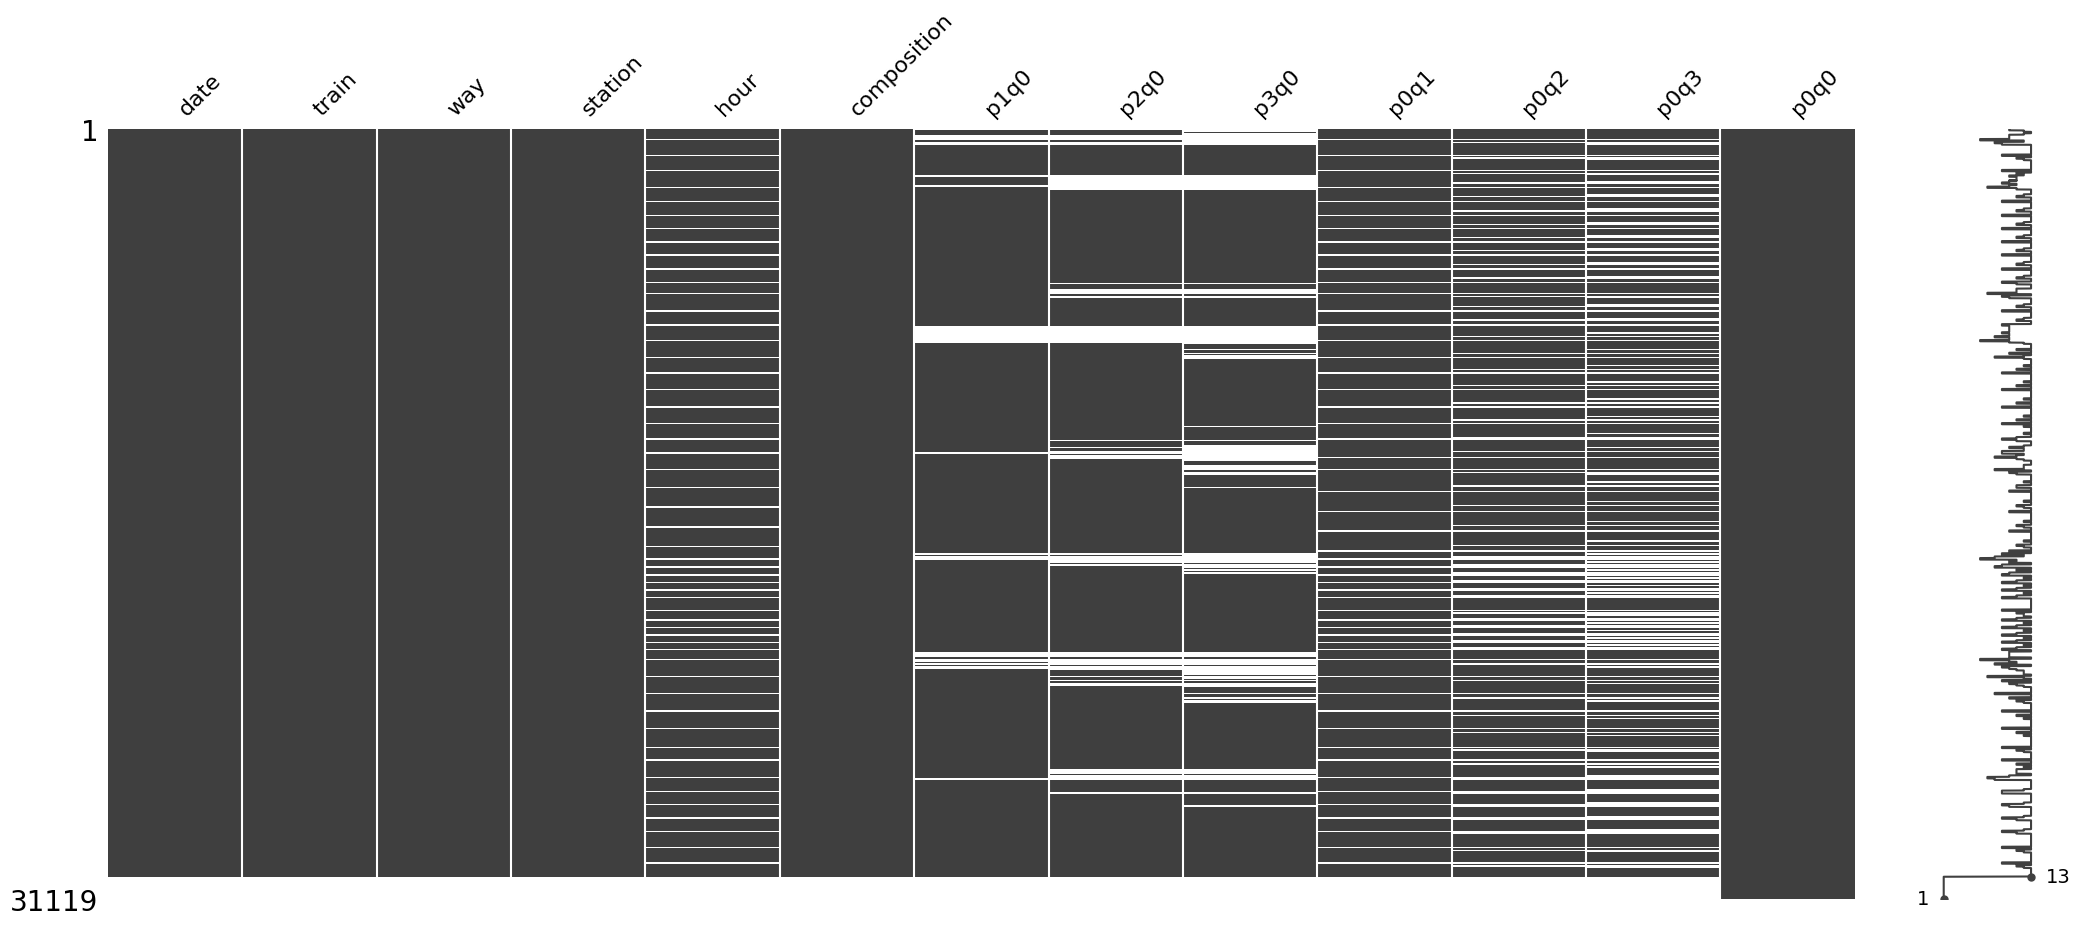

In [10]:
msno.matrix(df)



(17105, 13)

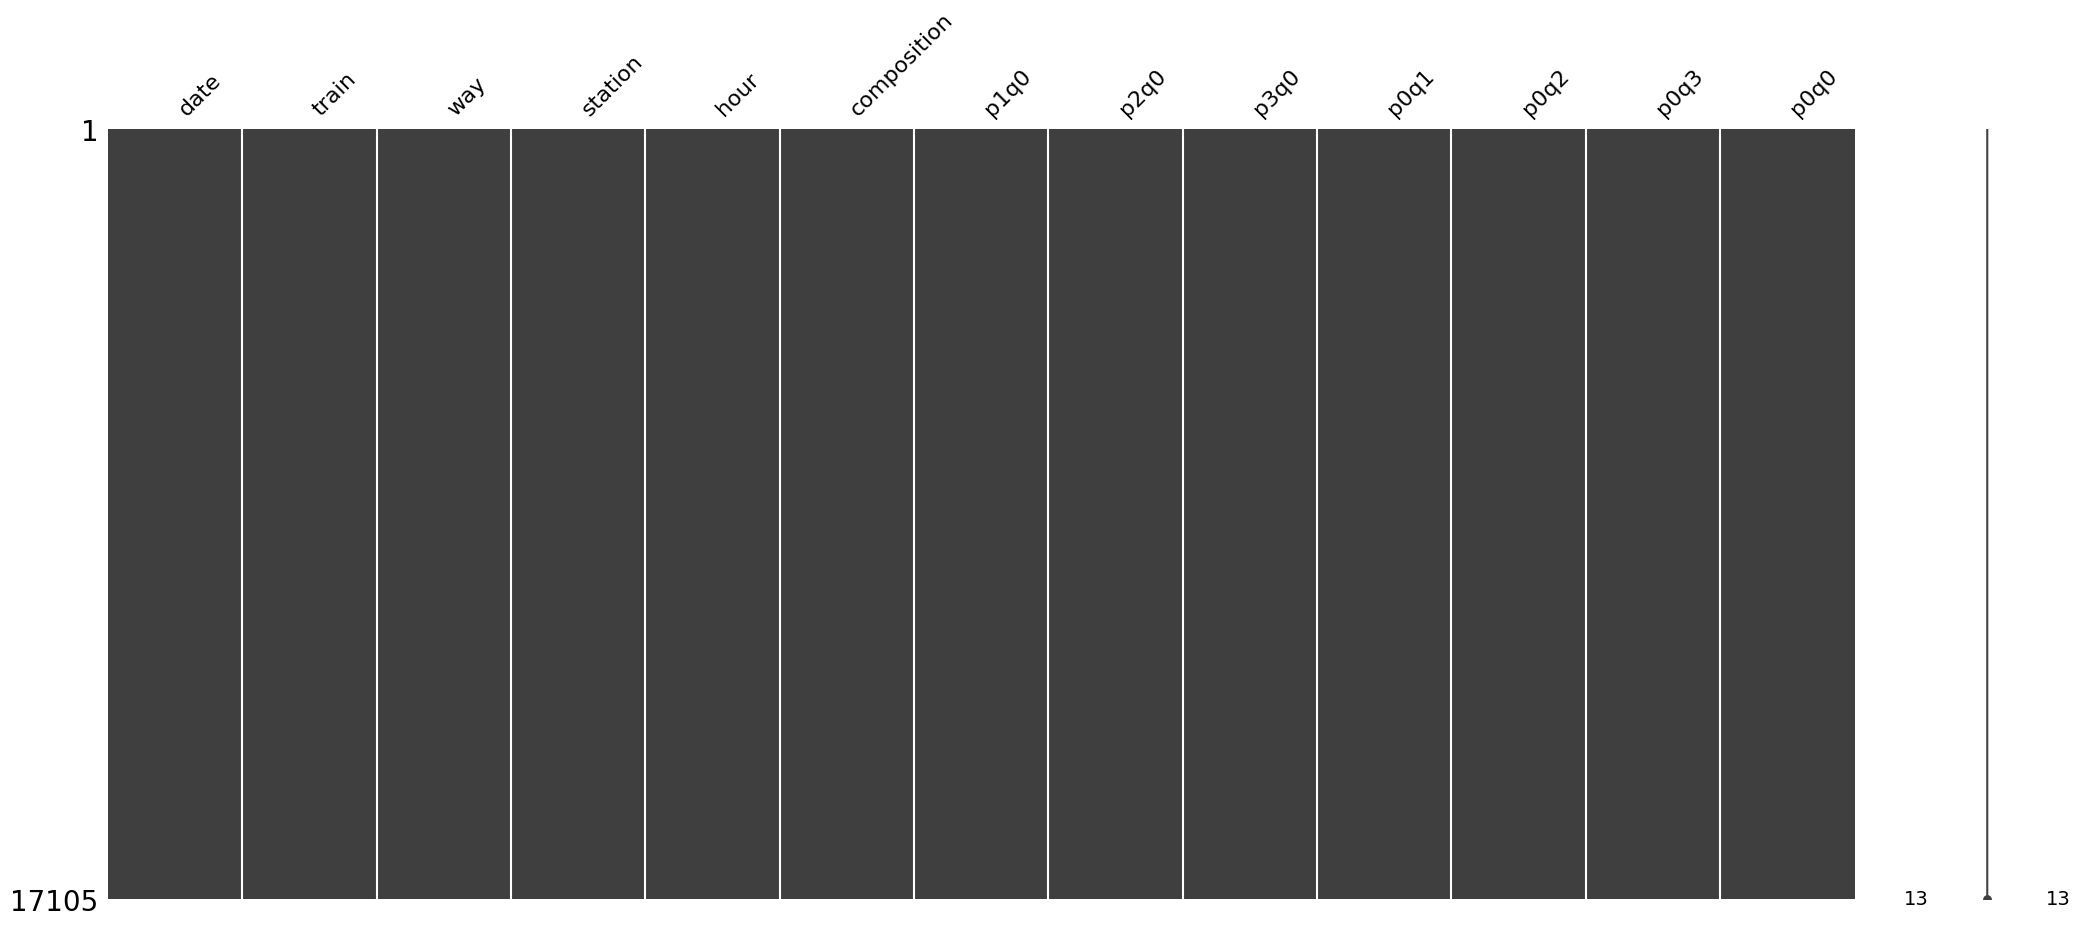

In [11]:
#we can try removing the missing values and see if it affects the results
df_nonull = df.dropna()
df_nonull.columns[df_nonull.isnull().any()].tolist()
msno.matrix(df_nonull)
df_nonull.shape

In [ ]:
# OR we replace the missing value with another value (kinda tamper the database)

In [44]:
#  maybe think about how to deal with non numerical data particularly in the column hour

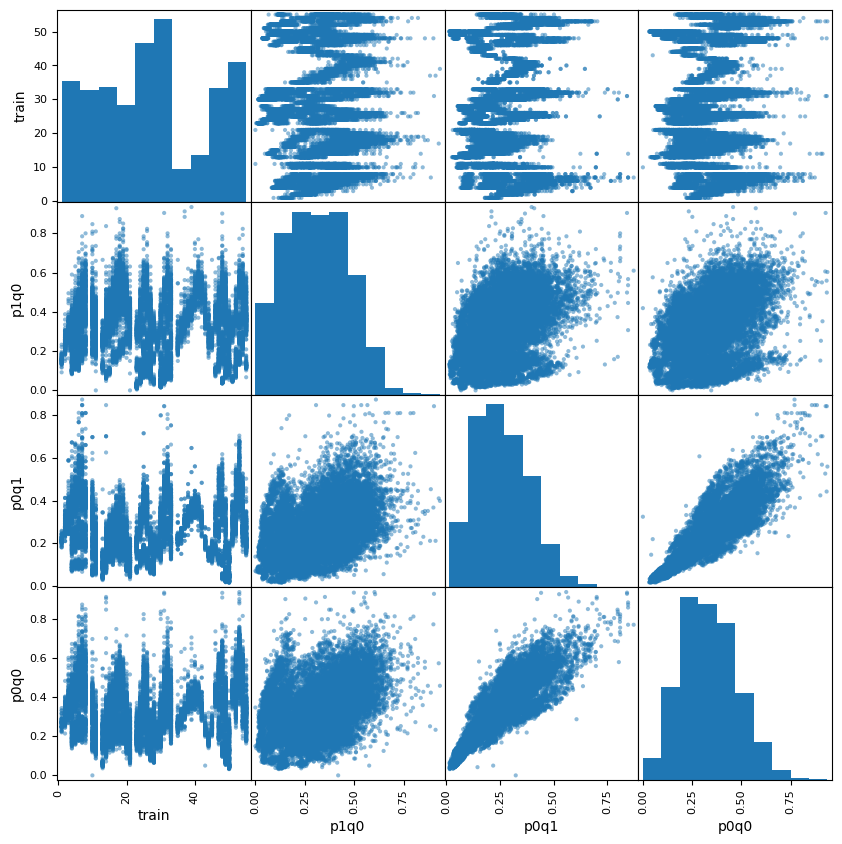

In [16]:
columns_to_plot = ['train',
                        'p1q0',
                        'p0q1','p0q0','hour',
                        ]
sm = scatter_matrix(df_nonull[columns_to_plot],
                   figsize=(10,10))

plt.show()

<Axes: title={'center': 'p1q0'}, xlabel='train'>

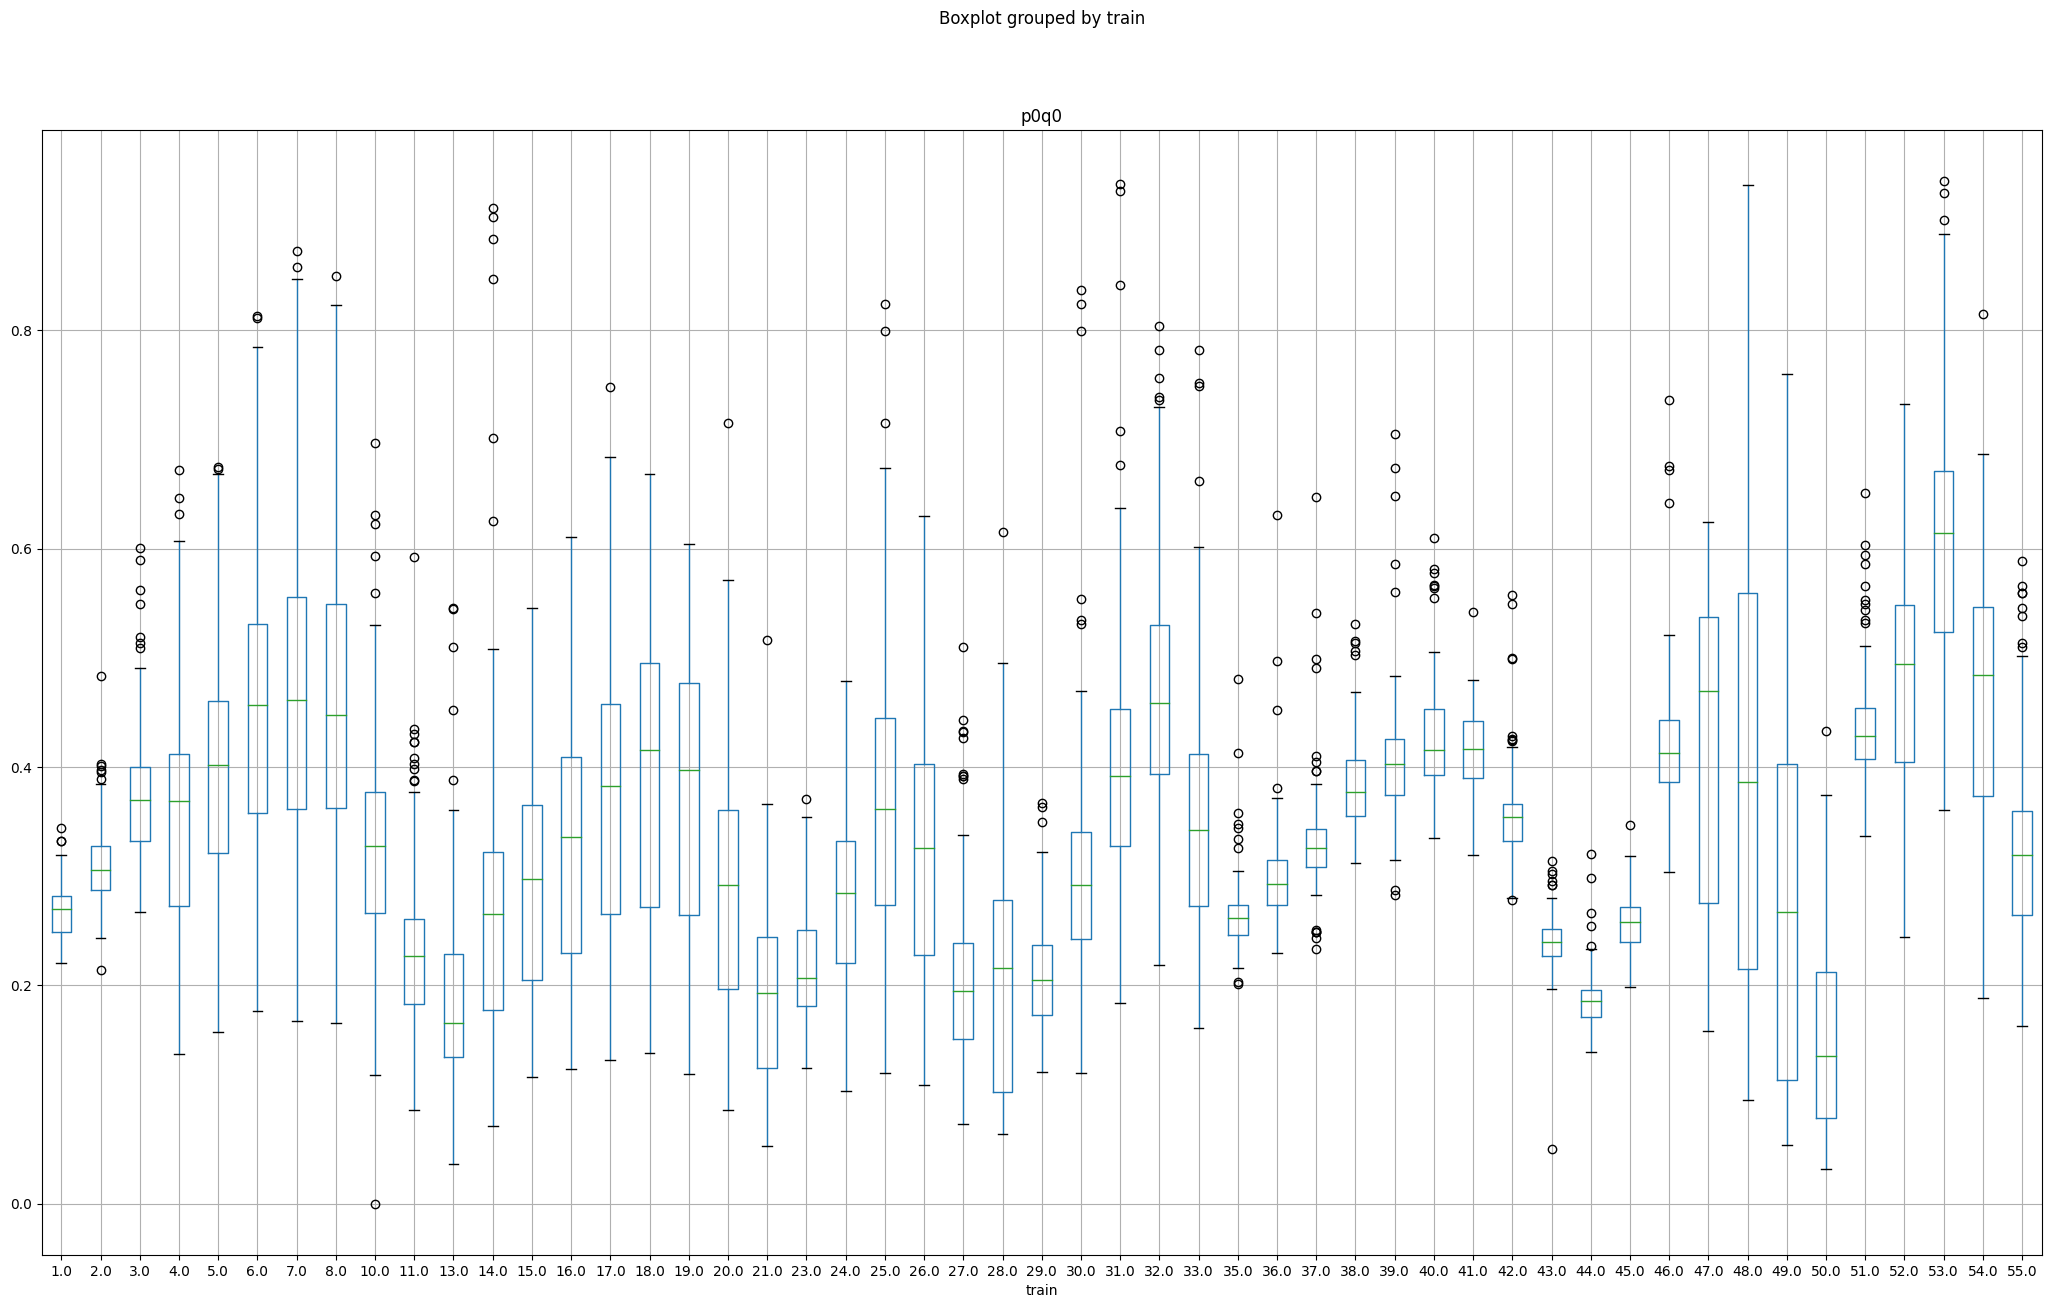

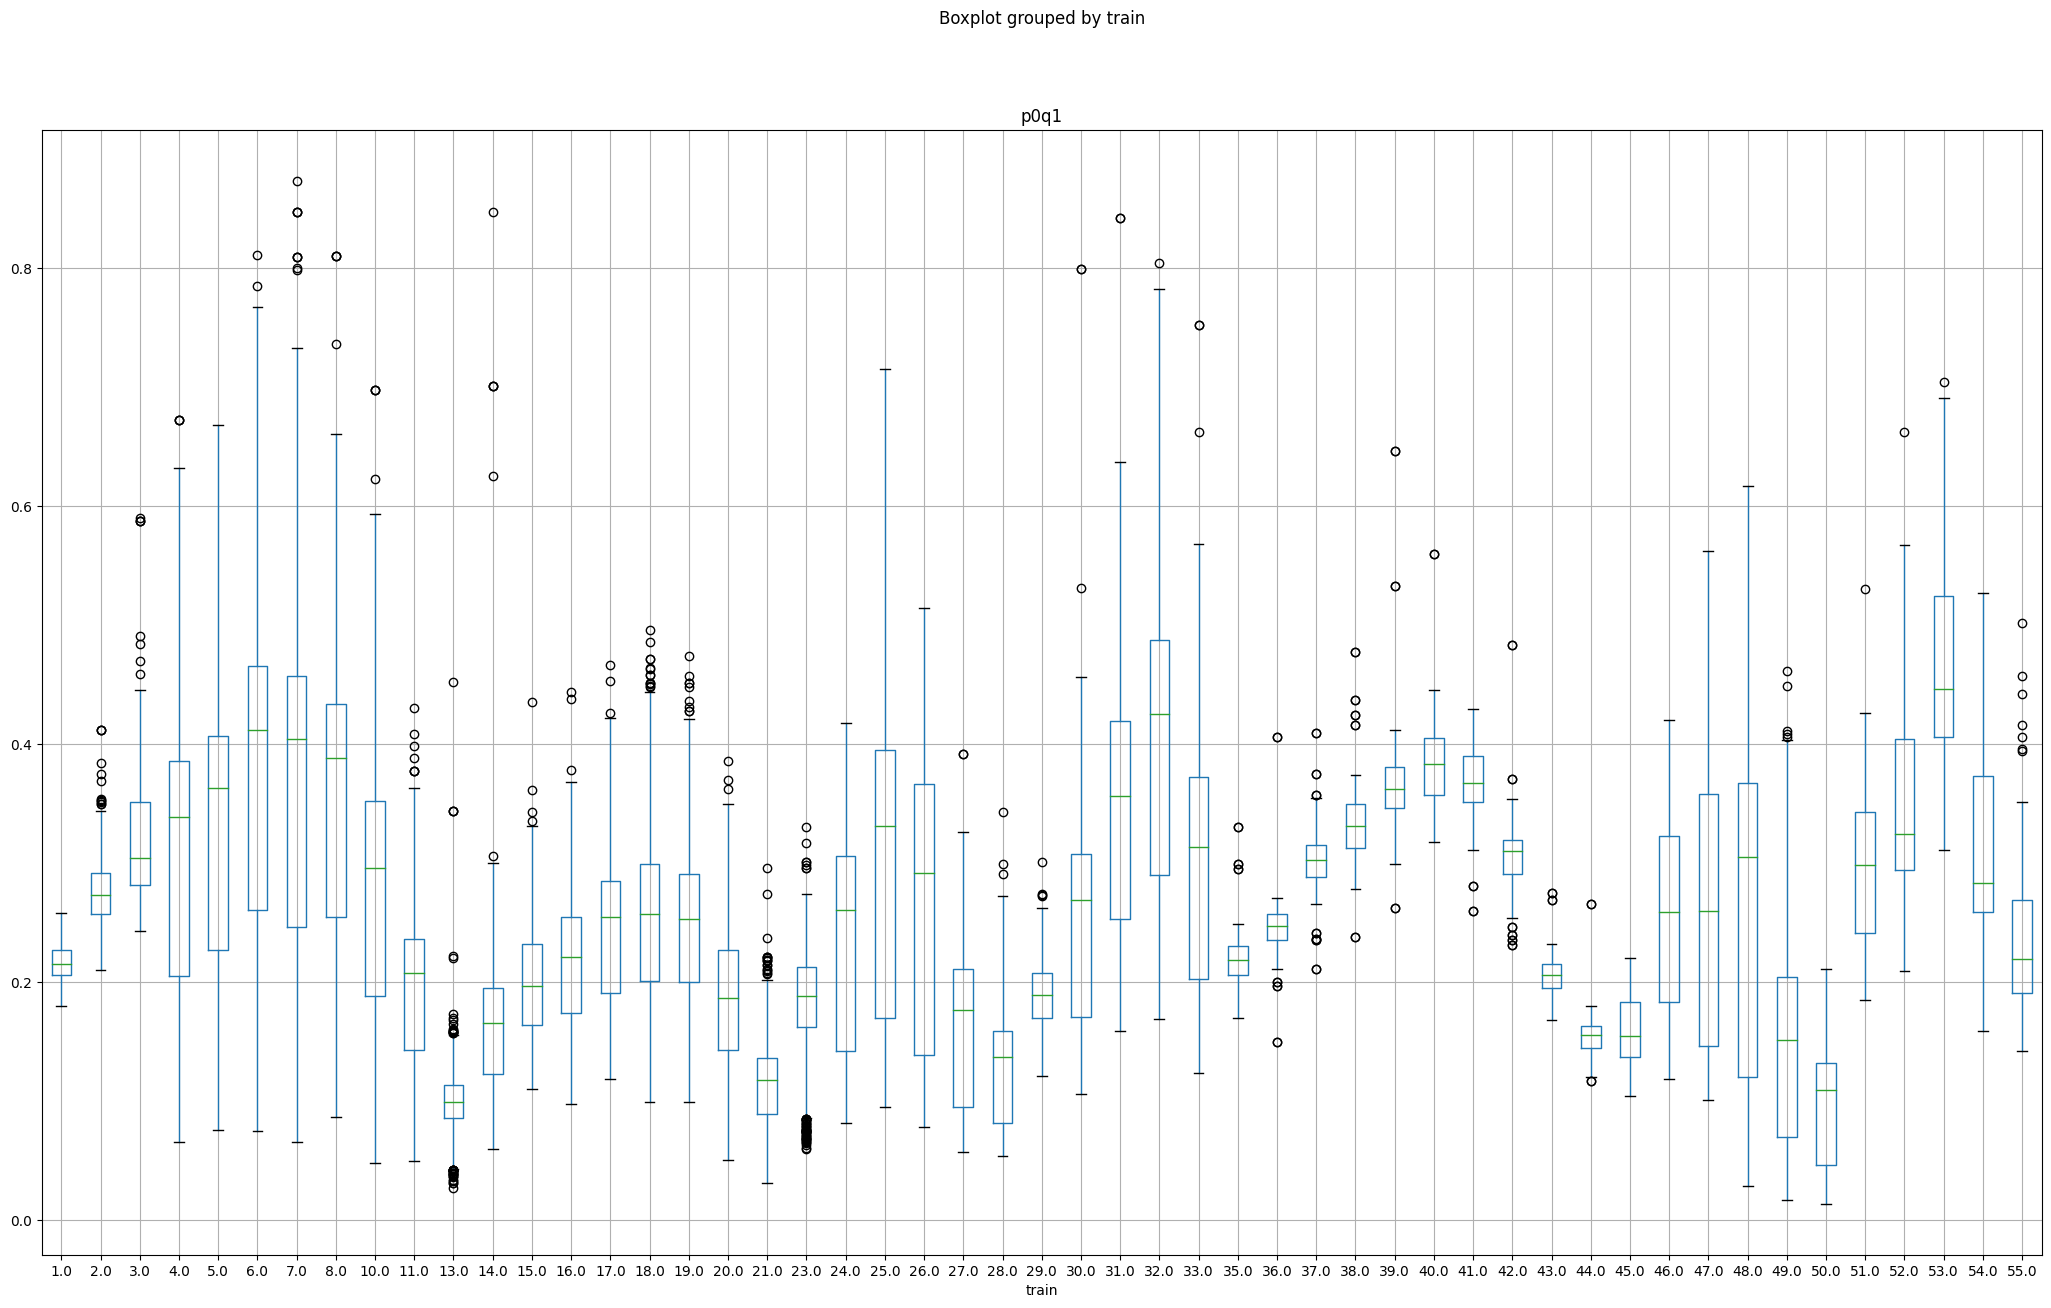

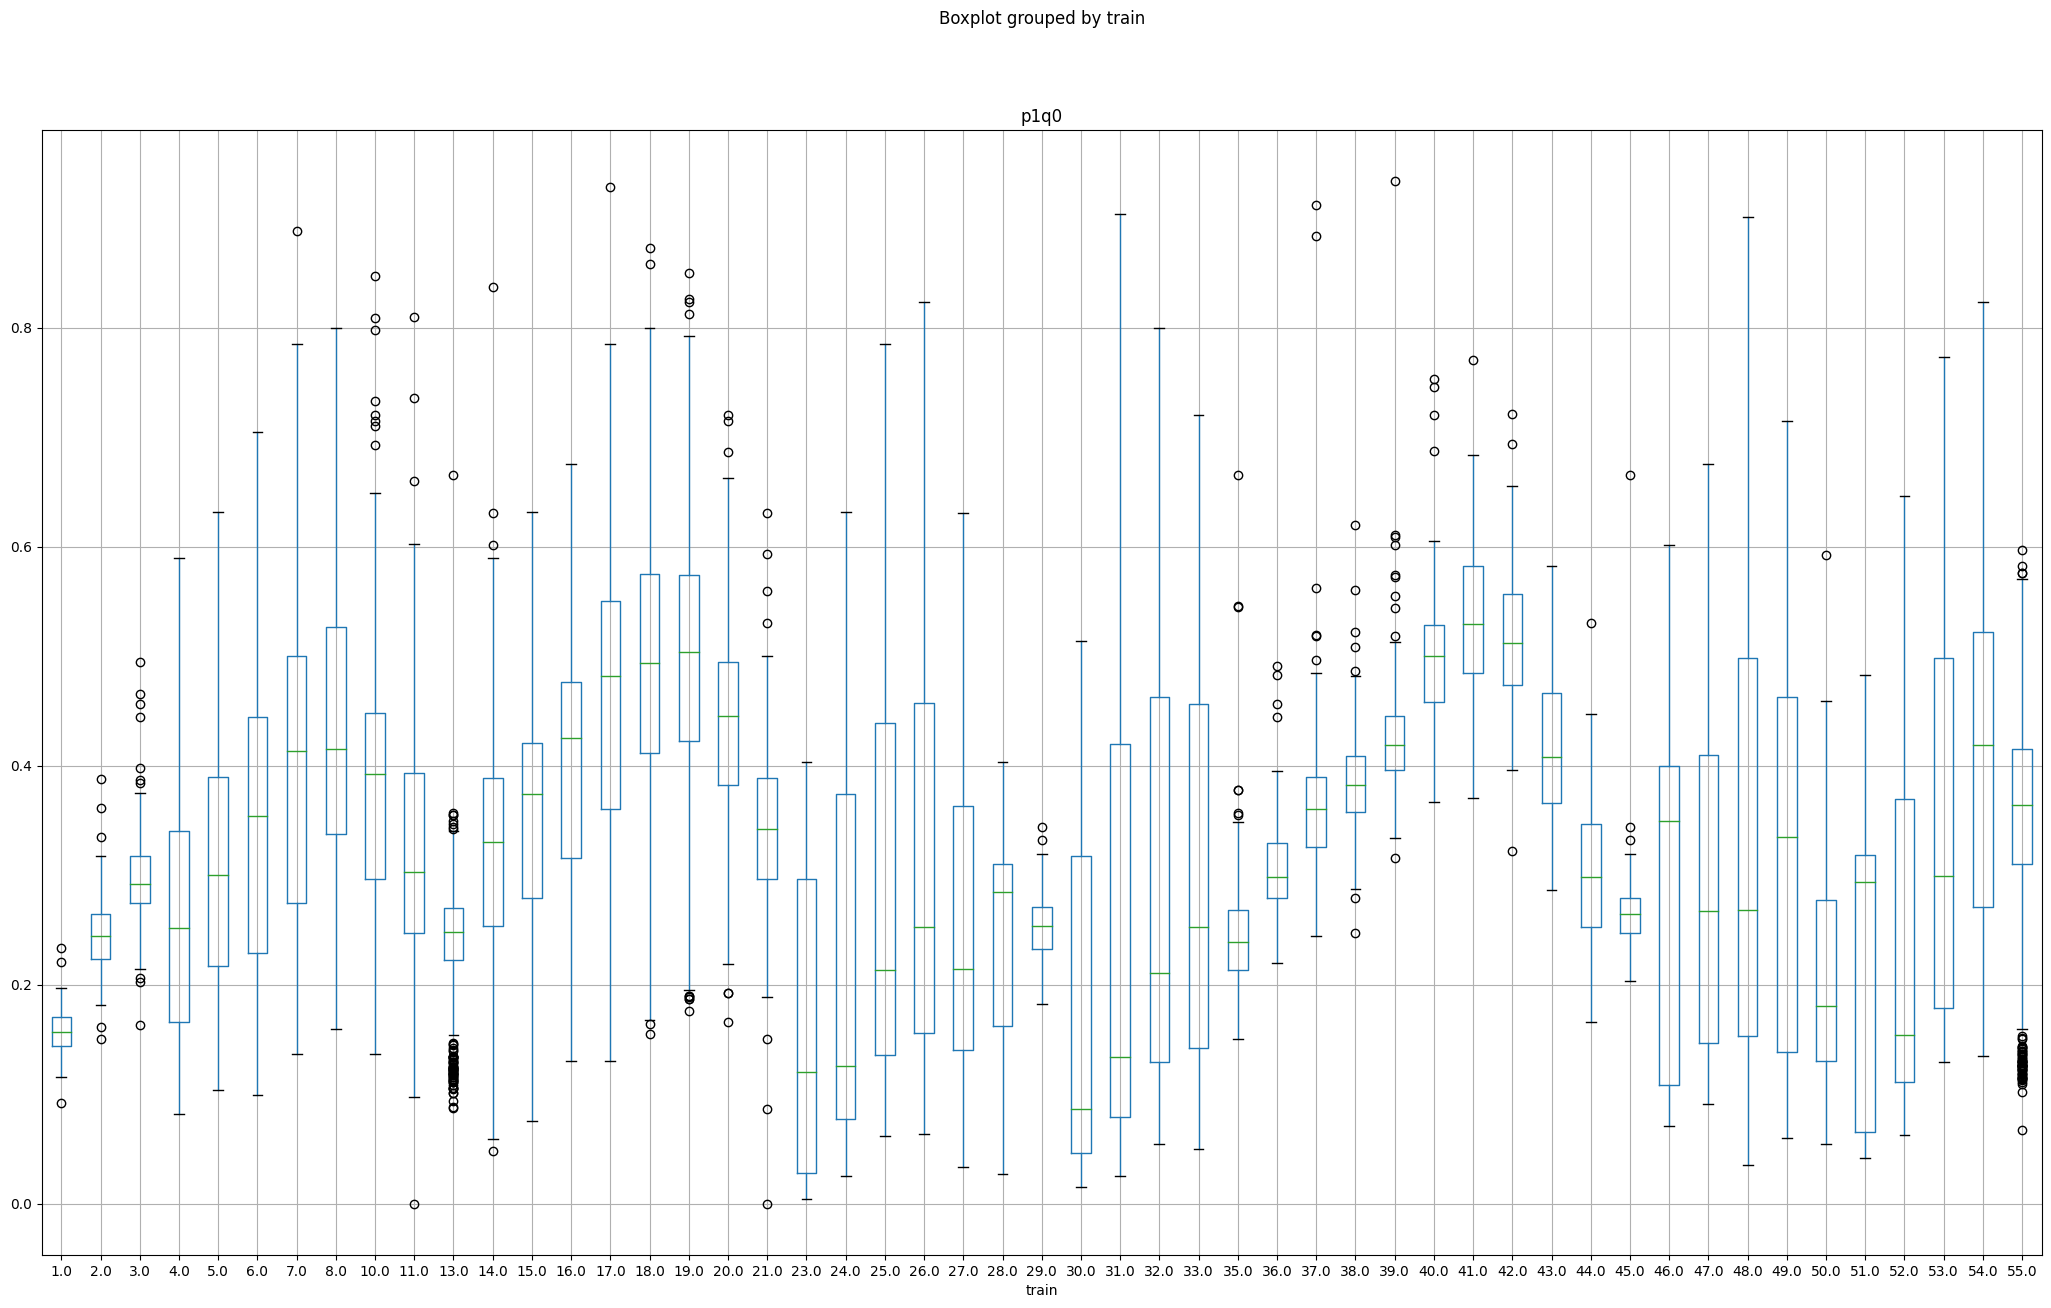

In [12]:
df_nonull.boxplot(column=['p0q0'], by="train", figsize=(25,15))
df_nonull.boxplot(column=['p0q1'], by="train", figsize=(25,15))
df_nonull.boxplot(column=['p1q0'], by="train", figsize=(25,15))

In [13]:
columns_to_plot = ['train','composition',
                        'p1q0',
                        'p0q1','p0q0'
                        ]
corrmatrix = df_nonull[columns_to_plot].corr()
corrmatrix

,train,composition,p1q0,p0q1,p0q0
train,1.000000,NaN,-0.067644,-0.019450,0.076392
composition,NaN,NaN,NaN,NaN,NaN
p1q0,-0.067644,NaN,1.000000,0.451362,0.450491
p0q1,-0.019450,NaN,0.451362,1.000000,0.875539
p0q0,0.076392,NaN,0.450491,0.875539,1.000000


In [1]:
df_train, df_test = train_test_split(df_nonull, test_size=0.3, random_state=2)

NameError: name 'train_test_split' is not defined